In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 DONE RIGHT OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,lyrics
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ..."
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,’65 Love Affair LyricsI was a car hop\nYou wer...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,(Can’t Live Without Your) Love And Affection L...
...,...,...,...,...,...,...
4455,amariJ. Cole,5,2021-05-29,amari,J. Cole,"4:44 Lyrics[Paroles de ""4:44"" par. ""Apollonthe..."
4456,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,​everything i wanted Lyrics[Verse 1]\nI had a ...
4457,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"​iSpy Lyrics[Intro: KYLE & Lil Yachty]\nMan, f..."
4458,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Once an Addict (Interlude) Lyrics[Intro]\nRigh...


In [4]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"Rolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on you, now I'm gonna make your head burn\nThink 

# Explode data into *one row per line*

In [5]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [6]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...
318985,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","YG - ""Sign Language"""
318986,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Yung Miami - ""Rap Freaks"""
318987,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray",10/30
318988,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Now United - ""Future Me"""


### Filter & clean

In [7]:
# doesn't need to be regex
BRACKETED = '^\[.*?\]$'  # eg "[...]"
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        BRACKETED, 
        regex= True, case=False, na=False
    )
]

with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]

In [8]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [9]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [10]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [11]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

## TODO: filter out the vrey common string `[Verse N]` eg `[Verse 1]`

# Dealing with non-lyrics returned from the API. For the prototype: just filter them out via *character length*. Long term TODO: replace them with the correct lyrics.

eg "Independent Women Part I" by Destiny's Child has Frederick Douglass's, “What To the Slave Is the Fourth of July?:

"Fellow-citizens! there is no matter in respect to which, the people of the North have allowed themselves to be so ruinously imposed upon, as that of the pro-slavery character of the Constitution. In that instrument I hold there is neither warrant, license, nor sanction of the hateful thing; but, interpreted as it ought to be interpreted, the Constitution is a GLORIOUS LIBERTY DOCUMENT. Read its preamble... etc"

I'm very curious just how the API returned this???

In [24]:
# EGADS!
with_even_more_filters['lyric_line'].str.len().describe()

count    290740.000000
mean         87.717947
std         320.253406
min           6.000000
25%          24.000000
50%          36.000000
75%          55.000000
max       34565.000000
Name: lyric_line, dtype: float64

In [25]:
# For context:
len("We could've had it all (tears are gonna fall, rolling in the deep)")

66

### Inspect what happens if we filter out long lyrics:

In [30]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 120
].lyric_line.str.len().describe()

count    260947.000000
mean         36.767903
std          19.786762
min           6.000000
25%          23.000000
50%          34.000000
75%          47.000000
max         119.000000
Name: lyric_line, dtype: float64

<AxesSubplot:>

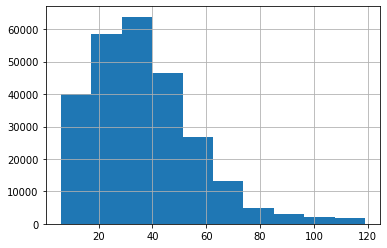

In [31]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 120
].lyric_line.str.len().hist()

## Ok, so just filter out anything 100+ characters

In [32]:
with_long_lyrics_removed = with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 100
]
with_long_lyrics_removed

,level_0,index,song_id,chart_position,chart_debut,song,performer,lyric_line
0,0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]
1,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago
2,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?"
3,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know"
4,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...,...
298677,318413,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray",October 2021 Singles Release Calendar Lyrics10/1
298699,318847,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Queens Cast, Eve, Naturi Naughton, Nadine Vela..."
298700,318848,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","- ""Belly of the Bitch"""
298701,318849,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Queens Cast, Brandy, Nadine Velazquez, Eve & N..."


### (so we don't have to re-name stuff as we do updates)

In [33]:
filtering_done = with_long_lyrics_removed

# Add a numeric date column (for fast filtering), eg `1974-01-01` becomes something like `1974.0`

In [39]:
date_column_cast_to_datetime = pd.to_datetime(filtering_done['chart_debut'])
date_column_cast_to_datetime

0        1974-12-21
1        1974-12-21
2        1974-12-21
3        1974-12-21
4        1974-12-21
            ...    
298677   2021-05-29
298699   2021-05-29
298700   2021-05-29
298701   2021-05-29
298702   2021-05-29
Name: chart_debut, Length: 257666, dtype: datetime64[ns]

In [46]:
day_as_a_percentage = pd.to_numeric(date_column_cast_to_datetime.dt.dayofyear) / 366 # for leap years. it's ok to be a little sloppy


In [49]:
year_int = pd.to_datetime(filtering_done['chart_debut']).dt.strftime('%Y').astype(int)
year_int

0         1974
1         1974
2         1974
3         1974
4         1974
          ... 
298677    2021
298699    2021
298700    2021
298701    2021
298702    2021
Name: chart_debut, Length: 257666, dtype: int64

0         1974.969945
1         1974.969945
2         1974.969945
3         1974.969945
4         1974.969945
             ...     
298677    2021.407104
298699    2021.407104
298700    2021.407104
298701    2021.407104
298702    2021.407104
Name: chart_debut, Length: 257666, dtype: float64

In [60]:
date_col_done = filtering_done.copy()
date_col_done['chart_debut_date_as_a_decimal'] = round(year_int + day_as_a_percentage, 2)
date_col_done

,level_0,index,song_id,chart_position,chart_debut,song,performer,lyric_line,chart_debut_date_as_a_decimal
0,0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1],1974.97
1,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago,1974.97
2,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?",1974.97
3,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know",1974.97
4,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me",1974.97
...,...,...,...,...,...,...,...,...,...
298677,318413,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray",October 2021 Singles Release Calendar Lyrics10/1,2021.41
298699,318847,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Queens Cast, Eve, Naturi Naughton, Nadine Vela...",2021.41
298700,318848,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","- ""Belly of the Bitch""",2021.41
298701,318849,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Queens Cast, Brandy, Nadine Velazquez, Eve & N...",2021.41


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [61]:
COLUMNS_FOR_VIZ = ['performer', 'song', 'lyric_line', 'chart_debut', 'chart_debut_date_as_a_decimal']

lyric_lines_ready_for_analysis = (
    date_col_done[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,performer,song,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,#9 Dream Lyrics[Verse 1],1974-12-21,1974.97
1,John Lennon,#9 Dream,So long ago,1974-12-21,1974.97
2,John Lennon,#9 Dream,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
3,John Lennon,#9 Dream,"I know, yes I know",1974-12-21,1974.97
4,John Lennon,#9 Dream,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
...,...,...,...,...,...
257661,"J. Cole, 21 Savage & Morray",my.life,October 2021 Singles Release Calendar Lyrics10/1,2021-05-29,2021.41
257662,"J. Cole, 21 Savage & Morray",my.life,"Queens Cast, Eve, Naturi Naughton, Nadine Vela...",2021-05-29,2021.41
257663,"J. Cole, 21 Savage & Morray",my.life,"- ""Belly of the Bitch""",2021-05-29,2021.41
257664,"J. Cole, 21 Savage & Morray",my.life,"Queens Cast, Brandy, Nadine Velazquez, Eve & N...",2021-05-29,2021.41


### Lyric lines by year (sanity check)

<AxesSubplot:>

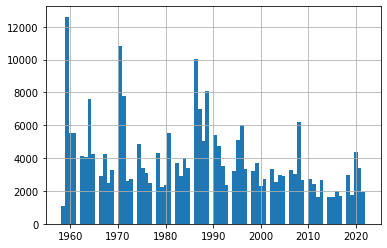

In [62]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=80)

In [63]:
lyric_lines_ready_for_analysis.to_csv('./data/3 DONE RIGHT OUTPUT One lyric lines per row, cleaned.csv', index=False)